# Berkeley Independent Study 2008-2018 Attendance Report
## By Corey J Wade
## November, 2018

The Independent Study Program of Berkeley High School is an option for all Berkeley High students who prefer individualized, weekly meetings with teachers. Due to the voluntary nature of the program, enrollment can be unpredictable.

Administration has expressed concerns about lower enrollment to start the year. This occurs because students often learn about BIS after a report card or another incident during the school year that convinces them to make significant curriular or school changes.

Fluctuating enrollment makes staffing BIS difficult. There must be enough teachers to handle mid-year surges in enrollment, without having an excess of teachers with low enrollment to start the year.

This report provides general data analysis of BIS attendance/enrollment and hypothesis testing of BIS early enrollment. The data used in this report, provided by BIS Union Representative David Schroeder, includes one row of enrollment per year, and three rows of attendance per year. 

Note that in BIS, students earn attendance not for showing up, but for turning in work.  

## Imports

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

# Silence warnings
warnings.filterwarnings('ignore')

# Set up seaborn dark grid
sns.set()

# Show graphs in notebook
%matplotlib inline

## DataFrame

In [2]:
# Set up nan values as floats
nan = float('NaN')

# Create dictionary from provided pdf values
d = {'type': ['October Enrollment', 'P1 ADA', 'P2 ADA', 'PA ADA', '% P2 Att'], '2008-2009': [132, nan, 144.78, nan, 1.097], '2009-2010': [117, nan, 131, nan, 1.12],
    '2010-2011': [136, nan, 121, nan, 0.89], '2011-2012': [135,114,111,112, 0.822], '2012-2013':[109,82,89,88,.817],
    '2013-1014': [130,114,109,109, 0.838], '2014-2015': [125, 113, 121, 126, 0.968],
    '2015-2016':[134, 98, 128, 130, 0.955], '2016-2017': [135, 132, 138, 134, 1.022], '2017-2018': [nan, 130, nan, nan, nan]}

# Create DataFrame
df = pd.DataFrame(d)

# Set index
df = df.set_index('type')

I coded in the data by hand since there were very few entries and PDFs are not easy to translate. I double-checked the data more than once to make sure that I did not make any errors.

In [3]:
# Display DataFrame
df

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-1014,2014-2015,2015-2016,2016-2017,2017-2018
type,,,,,,,,,,
October Enrollment,132.000,117.00,136.00,135.000,109.000,130.000,125.000,134.000,135.000,NaN
P1 ADA,NaN,NaN,NaN,114.000,82.000,114.000,113.000,98.000,132.000,130.0
P2 ADA,144.780,131.00,121.00,111.000,89.000,109.000,121.000,128.000,138.000,NaN
PA ADA,NaN,NaN,NaN,112.000,88.000,109.000,126.000,130.000,134.000,NaN
% P2 Att,1.097,1.12,0.89,0.822,0.817,0.838,0.968,0.955,1.022,NaN


This is essentialy a copy of the provided PDF. Each entry lists the given enrollment or attendance (ADA) for different periods, except for the last row. The last row is the percentage of increase or decrease from the first (index 0) to third row (index 2). The first row is the "October CALPADS Enrollment," and the third row is attendance taken later in the year.

This row is not relevant for our purposes.

## Delete Non-Enrollment Row

In [4]:
# The last row is not relevant here
df = df[0:4]
df

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-1014,2014-2015,2015-2016,2016-2017,2017-2018
type,,,,,,,,,,
October Enrollment,132.00,117.0,136.0,135.0,109.0,130.0,125.0,134.0,135.0,NaN
P1 ADA,NaN,NaN,NaN,114.0,82.0,114.0,113.0,98.0,132.0,130.0
P2 ADA,144.78,131.0,121.0,111.0,89.0,109.0,121.0,128.0,138.0,NaN
PA ADA,NaN,NaN,NaN,112.0,88.0,109.0,126.0,130.0,134.0,NaN


That NaN values will be left in. Although it's tempting to replace them with mean attendance, such a replacement would create attendance periods that were never recorded and could sway the results. 

## Attendance/Enrollment

Since attendance and enrollment are different categories, their data should be examined separately.

In [5]:
# Create attendance DataFrame
df_attendance = df[1:]

# Create enrollment DataFrame
df_enrollment = df[0:1]

## Attendance By Year

In [6]:
# View statistics by year
df_attendance.describe()

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-1014,2014-2015,2015-2016,2016-2017,2017-2018
count,1.00,1.0,1.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0
mean,144.78,131.0,121.0,112.333333,86.333333,110.666667,120.000000,118.666667,134.666667,130.0
std,NaN,NaN,NaN,1.527525,3.785939,2.886751,6.557439,17.925773,3.055050,NaN
min,144.78,131.0,121.0,111.000000,82.000000,109.000000,113.000000,98.000000,132.000000,130.0
25%,144.78,131.0,121.0,111.500000,85.000000,109.000000,117.000000,113.000000,133.000000,130.0
50%,144.78,131.0,121.0,112.000000,88.000000,109.000000,121.000000,128.000000,134.000000,130.0
75%,144.78,131.0,121.0,113.000000,88.500000,111.500000,123.500000,129.000000,136.000000,130.0
max,144.78,131.0,121.0,114.000000,89.000000,114.000000,126.000000,130.000000,138.000000,130.0


Most years show means close to medians suggesting that the data is somewhat evenly distributed.

The standard deviations range from 1.5 to 17.9, although they are usually less than 7. This is an early indicator that enrollment does not fluctuate too much.

## Enrollment By Year

In [7]:
# Transpose Enrollment Row then display stats
df_enrollment.T.describe()

type,October Enrollment
count,9.000000
mean,128.111111
std,9.413347
min,109.000000
25%,125.000000
50%,132.000000
75%,135.000000
max,136.000000


Noe that the standard deviation of enrollment is 9.4 indicating that enrollment is often within 10 students of the mean enrollment of 128.

Let's compute the full range:

In [8]:
df_enrollment.T.max()-df_enrollment.T.min()

type
October Enrollment    27.0
dtype: float64

These  are important results. The greatest change in recorded enrollment over the last 10 years for BIS is 27 students. The usual change is about 10. BIS teachers see 1 student per half hour, and students take an average of 3 classes per quarter. We can thus convert enrollment changes to teacher hours.

In [9]:
def enrollment_to_teacher_hours(enrollment):
    classes = enrollment * 3
    teacher_hours = classes/2
    return teacher_hours

In [10]:
high = enrollment_to_teacher_hours(27)

avg = enrollment_to_teacher_hours(10)

print('Greatest change in teacher hours over ten year period:', high)

print('Average change in teacher hours over ten year period', avg)

Greatest change in teacher hours over ten year period: 40.5
Average change in teacher hours over ten year period 15.0


This could be the problem. There is a difference of about 25 teacher hours from enrolment changes in a regular year to an extreme year. 

We can use linear regression to predict enrollment going forward. First, let's adjust the DataFrames.

## Transposing DataFrame

In [11]:
# Transpose DataFrame
df_t = df.T

# Display transposed DataFrame
df_t

type,October Enrollment,P1 ADA,P2 ADA,PA ADA
2008-2009,132.0,NaN,144.78,NaN
2009-2010,117.0,NaN,131.00,NaN
2010-2011,136.0,NaN,121.00,NaN
2011-2012,135.0,114.0,111.00,112.0
2012-2013,109.0,82.0,89.00,88.0
2013-1014,130.0,114.0,109.00,109.0
2014-2015,125.0,113.0,121.00,126.0
2015-2016,134.0,98.0,128.00,130.0
2016-2017,135.0,132.0,138.00,134.0
2017-2018,NaN,130.0,NaN,NaN


In [12]:
# View statistics by attendance period
df_t.describe()

type,October Enrollment,P1 ADA,P2 ADA,PA ADA
count,9.000000,7.000000,9.000000,6.000000
mean,128.111111,111.857143,121.420000,116.500000
std,9.413347,17.458795,16.844512,17.131842
min,109.000000,82.000000,89.000000,88.000000
25%,125.000000,105.500000,111.000000,109.750000
50%,132.000000,114.000000,121.000000,119.000000
75%,135.000000,122.000000,131.000000,129.000000
max,136.000000,132.000000,144.780000,134.000000


Note that attendance standard deviations are much higher than enrollment. This is likely due to two factors: 1) Early attendance will be lower than enrollment because some students will not do work; and 2) Later attendance can be higher than enrollment due to late-year surges in enrollment.

Note that later attendance periods can only exceed October Enrollment if enrollment in fact increases.

## Organize Data

In [13]:
#Prepare data for linear regression
# Eliminate NaN values
x_E = np.linspace(2009,2017,9)
y_E = df_t['October Enrollment'][0:-1]

y_P1 = df_t['P1 ADA'][3:]
x_P1 = np.linspace(2012, 2018, 7)

y_P2 = df_t['P2 ADA'][:-1]
x_P2 = np.linspace(2009, 2017, 9)

y_PA = df_t['PA ADA'][3:-1]
x_PA = np.linspace(2012, 2017, 6)

In [14]:
# Create array of all points
x_att = []
y_att = []

XLIST = [x_P1, x_P2, x_PA]
x_att = np.concatenate(XLIST, axis=0)

YLIST = [y_P1, y_P2, y_PA]
y_att = np.concatenate(YLIST, axis=0)

XLIST_ALL = [x_P1, x_P2, x_PA, x_E]
x_all = np.concatenate(XLIST_ALL, axis=0)

YLIST_ALL = [y_P1, y_P2, y_PA, y_E]
y_all = np.concatenate(YLIST_ALL, axis=0)

## Box Plots

In [15]:
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color) 

#### Enrollment

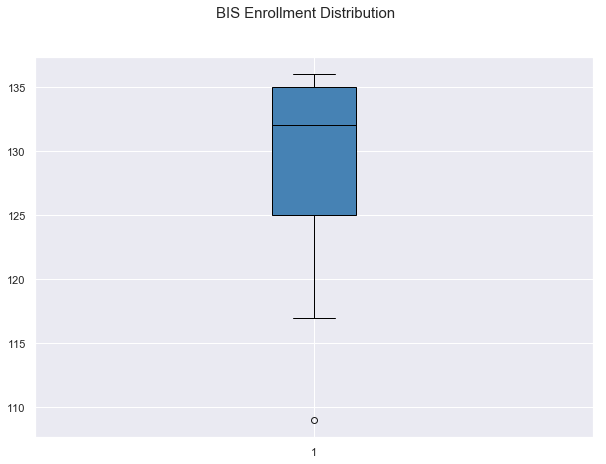

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
draw_plot(y_E, 'black', 'steelblue')
fig.suptitle('BIS Enrollment Distribution', fontsize=15)
#ax.set_xlabel('Box Plot')
#ax.set_ylabel('Enrollment')
plt.show()

In [17]:
df_enrollment.T

type,October Enrollment
2008-2009,132.0
2009-2010,117.0
2010-2011,136.0
2011-2012,135.0
2012-2013,109.0
2013-1014,130.0
2014-2015,125.0
2015-2016,134.0
2016-2017,135.0
2017-2018,NaN


In [18]:
df_enrollment_adjusted = df_enrollment.T.drop(index='2012-2013')

In [19]:
df_enrollment_adjusted.describe()

type,October Enrollment
count,8.000000
mean,130.500000
std,6.524678
min,117.000000
25%,128.750000
50%,133.000000
75%,135.000000
max,136.000000


In [20]:
high_ea = df_enrollment_adjusted['October Enrollment'].max() - df_enrollment_adjusted['October Enrollment'].min()
avg_ea = df_enrollment_adjusted['October Enrollment'].std()

high_a = enrollment_to_teacher_hours(high_ea)

avg_a = enrollment_to_teacher_hours(avg_ea)

print('Greatest change in teacher hours over ten year period without outlier:', high_a)

print('Average change in teacher hours over ten year period without outlier', avg_a)

Greatest change in teacher hours over ten year period without outlier: 28.5
Average change in teacher hours over ten year period without outlier 9.787017640002203


This looks a little more manageable.

#### Attendance

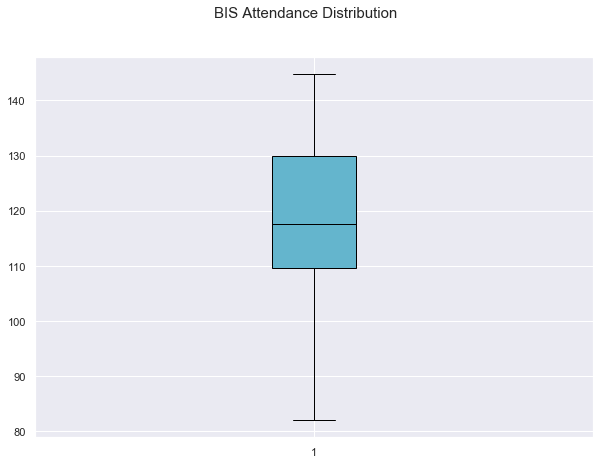

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
draw_plot(y_att, 'black', 'c')
fig.suptitle('BIS Attendance Distribution', fontsize=15)
#ax.set_xlabel('Box Plot')
#ax.set_ylabel('Enrollment')
plt.show()

Attendance is a little more symmetric.

## Histograms

In [22]:
def hist(x, title, color='c', alpha=0.6, ymax=12, xlabel='Enrollment'):

    # Create larger size of figure
    plt.figure(figsize=(10,7))
    
    # Create histogram of 20 bins showing fares from 0 to $20
    plt.hist(x, bins=7, range=(80,150), ec='white', color=color, alpha=alpha)

    # Create labels
    plt.xlabel(xlabel)
    plt.ylabel('Reports')
    plt.title(title, fontsize=15)
    plt.ylim(0, ymax)

    # Save figure
    plt.savefig(title, dpi=300)

    # Show graph
    plt.show()

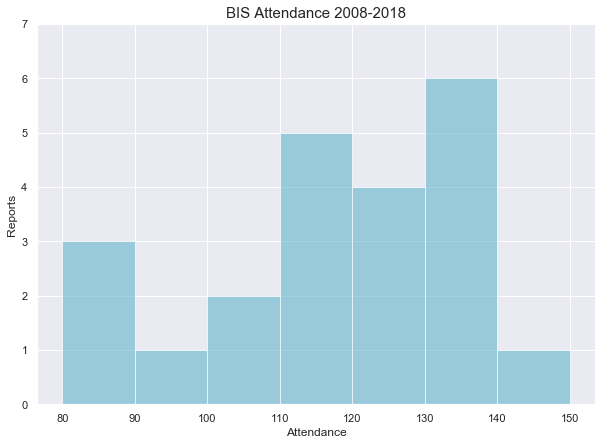

In [23]:
hist(y_att, 'BIS Attendance 2008-2018', ymax=7, xlabel='Attendance', color='c')

Most attendance reports are in the 110-140 range.

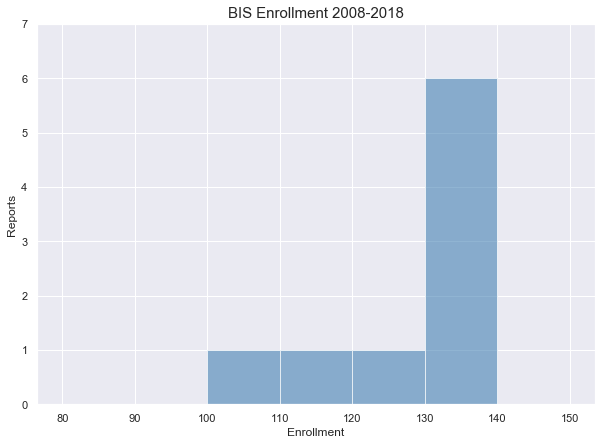

In [24]:
hist(y_E, 'BIS Enrollment 2008-2018', ymax=7, xlabel='Enrollment', color='steelblue')

This histogram is very telling. Almost all enrollment reports have 130-something students.

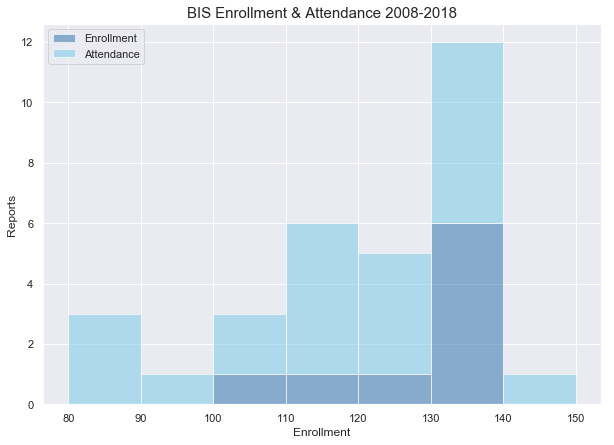

In [25]:
#Stack the data
plt.figure(figsize=(10,7))
pal = ['steelblue', 'skyblue']
plt.hist([y_E, y_att], bins=7, label=['Enrollment', 'Attendance'], range=(80,150), color=pal, alpha=0.6, stacked=True)
plt.legend(loc='upper left')
plt.xlabel('Enrollment')
plt.ylabel('Reports')
plt.title('BIS Enrollment & Attendance 2008-2018', fontsize=15)
plt.show()

As expected, attendance sandwiches enrollment. 

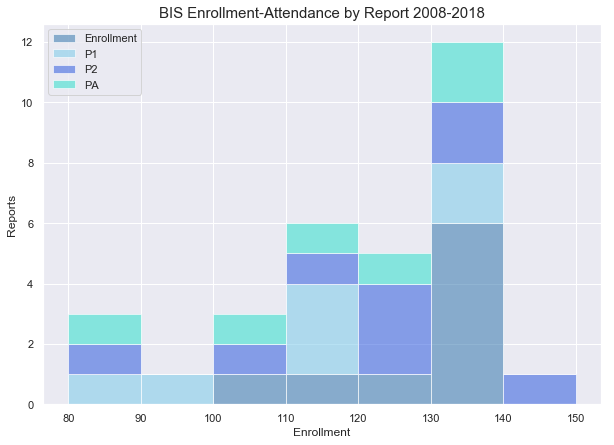

In [26]:
#Stack the data
plt.figure(figsize=(10,7))
pal = ['steelblue', 'skyblue', 'royalblue', 'turquoise']
plt.hist([y_E, y_P1, y_P2, y_PA], bins=7, label=['Enrollment', 'P1', 'P2', 'PA'], range=(80,150), color=pal, alpha=0.6, stacked=True)
plt.legend(loc='upper left')
plt.xlabel('Enrollment')
plt.ylabel('Reports')
plt.title('BIS Enrollment-Attendance by Report 2008-2018', fontsize=15)
plt.show()

The first attendance period appears to be the lowest on average.

## Scatter Plots

In [27]:
def ols_poly(x, y, degree):
    poly_list = np.array([x**i for i in range(1,degree + 1)])
    X = np.column_stack(poly_list)
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    est = model.fit()
    summary = est.summary()
    
    x_pred = np.linspace(2007,2020,900)
    pred_list = np.array([x_pred**i for i in range(1,degree+1)])
    X_pred = np.column_stack(pred_list)
    X_pred2 = sm.add_constant(X_pred)
    y_pred = est.predict(X_pred2)
    
    return X_pred2, y_pred, summary

In [28]:
# Define function that displays all attendance points
def all_attendance(regression=False, color=True, title='BIS Attendance', both=False, degree=1):

    fig, ax = plt.subplots(figsize=(10, 7))
    
    if color:
        if both:
            ax.scatter(x_E, y_E, alpha=0.5, s=150, c = 'steelblue')
        ax.scatter(x_P1, y_P1, alpha=0.6, s= 75, c = 'skyblue')
        ax.scatter(x_P2, y_P2, alpha=0.5, s= 75, c='slateblue')
        ax.scatter(x_PA, y_PA, alpha=0.6, s= 75, c='lightgreen')

    else:
        if both:
            ax.scatter(x_all, y_all, alpha=0.5, s=95, c = 'c')    
        else:
            ax.scatter(x_att, y_att, alpha=0.5, s=95, c = 'c')

    fig.suptitle(title, fontsize=15)

    fig.tight_layout(pad=2); 

    ax.grid(True)

    ax.set_xlim([2008, 2019])
    ax.set_ylim([0,160])
    ax.set_xlabel('Year')
    ax.set_ylabel('Attendance')
    ax.set_xticks(np.linspace(2008, 2018, 11))
    
    if regression:
        
        if both:
            x_pred, y_pred, summary = ols_poly(x_all, y_all, degree)
        else:
            x_pred, y_pred, summary = ols_poly(x_att, y_att, degree)
        
        ax.plot(x_pred, y_pred, '-', color='orchid', linewidth=1.5, alpha=0.75)    

    plt.legend(loc='lower right')
        
    plt.show()
    
    fig.savefig(title, dpi=325)
    
    if regression:
        print(summary)

#### All Attendance Scatter Plot

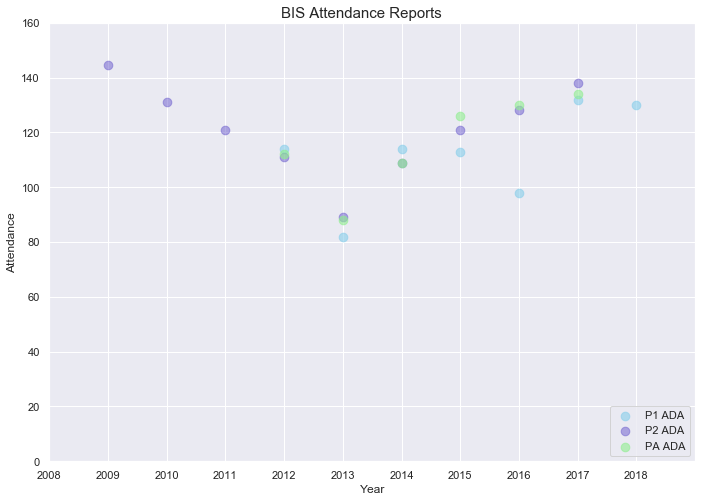

In [29]:
all_attendance(title='BIS Attendance Reports')

There is a clear pattern of attendance. It makes a nice V-shape. But there is no reason to expect the V-shape to continue. Attendance may have been trending downward, and then trending upward. We want to know the overall expectation. Linear regression is the most straightforward option, and a nice place to start.

#### All Attendance Regression Line

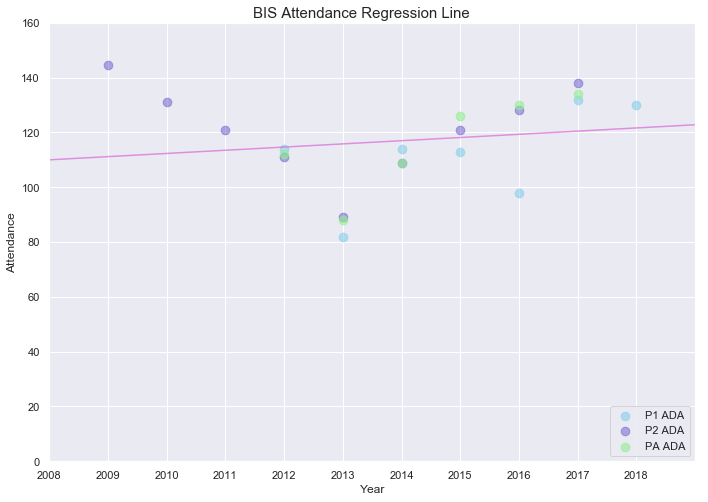

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.5778
Date:                Fri, 23 Nov 2018   Prob (F-statistic):              0.456
Time:                        16:57:08   Log-Likelihood:                -92.465
No. Observations:                  22   AIC:                             188.9
Df Residuals:                      20   BIC:                             191.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2226.4200   3083.031     -0.722      0.4

In [30]:
all_attendance(regression=True, title='BIS Attendance Regression Line')

The regression line suggests that overall attendance is slightly increasing. Specifically, the OLS results tell us that every year the expected attendance goes up by about 1 student (coef x1: 1.1636). Furthermore, the standard error of 1.531 indicates that actual attendance deviates from the line by about 1.5 students.

The R^2 value, however, is quite low at 0.028. This means that most of the variation in Y is not explained by the variation in X. In reality, a very low R^2 in this particular case is understandable. Years are not good predictors of attendance. Consider going back to the year 0 (intercept: -2226), and going 100 years forward. Both are meaningless. It's not the relationship between years and attendance that interests us here, but consistent patterns of attendance over time.

Another significant statistic is the 95% confidence interval given as -2 to 4. We are 95% confident that in a given year attendance will go up by about 4 students, or down by about 2 students.

#### All Attendance Quadratic Regression

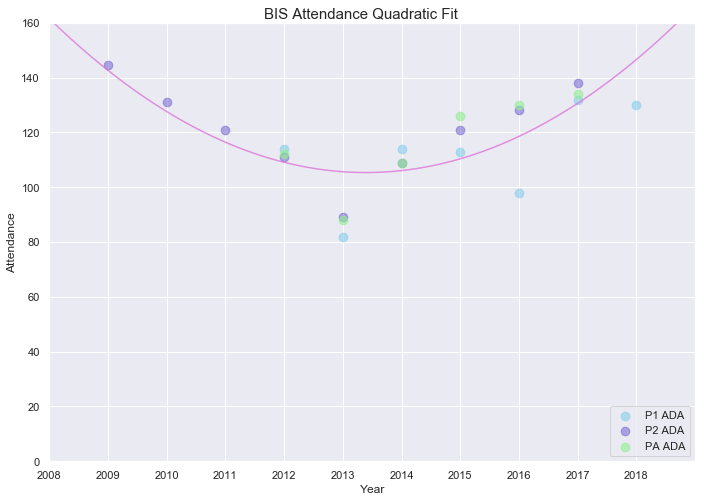

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     11.74
Date:                Fri, 23 Nov 2018   Prob (F-statistic):           0.000478
Time:                        16:57:08   Log-Likelihood:                -83.926
No. Observations:                  22   AIC:                             173.9
Df Residuals:                      19   BIC:                             177.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8156      1.232      4.719      0.0

In [31]:
all_attendance(regression=True, title='BIS Attendance Quadratic Fit', degree=3)

Several significant changes come with the quadratic curve, most notably, and increase in R^2 to 55%. But for reasons suggested above, this not a good model. For instance, attendance in 2019 will not exceed 160 students. There is a maximum capacity that gets filled when teachers can't take any more students. That number is around 160, depending on the year, and attendance will always be lower. Similarly, attendance did not skyrocket before 2008.

Given the absurdities of such a model, despite the goodness of fit, we will be sticking with linear models going forward.

#### Ordinary Least Squares Formula

In [32]:
def ols(x, y, color='c', title='BIS Attendance', alpha=0.6, degree=1):
    
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.scatter(x, y, alpha=alpha, color=color, s=95)

    fig.suptitle(title, fontsize=15)

    fig.tight_layout(pad=2); 

    ax.grid(True)
    
    x_pred = np.linspace(2007,2020,900)
    
    ax.set_xlim([2008, 2019])
    ax.set_ylim([0,160])
    ax.set_xlabel('Year')
    ax.set_ylabel('Attendance')
    ax.set_xticks(np.linspace(2008, 2018, 11))
        
    x_pred, y_pred, summary = ols_poly(x, y, degree)
 
    ax.plot(x_pred, y_pred, '-', color='orchid', linewidth=1.5, alpha=0.75)

    plt.show()

    fig.savefig(title, dpi=325)

    print(summary)

#### Enrollment OLS

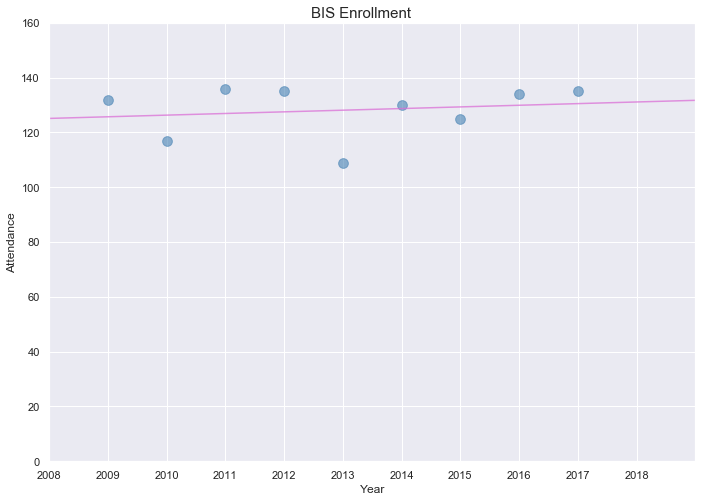

                            OLS Regression Results                            
Dep. Variable:     October Enrollment   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                    0.2200
Date:                Fri, 23 Nov 2018   Prob (F-statistic):              0.653
Time:                        16:57:09   Log-Likelihood:                -32.280
No. Observations:                   9   AIC:                             68.56
Df Residuals:                       7   BIC:                             68.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1079.6889   2575.071     -0.419      0.6

In [33]:
ols(x_E, y_E, 'steelblue', title='BIS Enrollment')

Linear regression on enrollment gives similar results. The 95% confidence interval is that enrollment increases by about 3.5 students or descreases by about 2.5 students in subsequent years. The standard error remains very low at about 1.3.

The enrollment regression line is very similar to the attendance regression line. Enrollment goes up by 0.60 students per year. The 95% confidence interval is a decrease of 2 students to an increase of 4 students. R^2 is similarly low.

#### Including Enrollment With Attendance

It's interesting to see how enrollment fits in with attendance. Will the linear regression line by stronger or weaker?

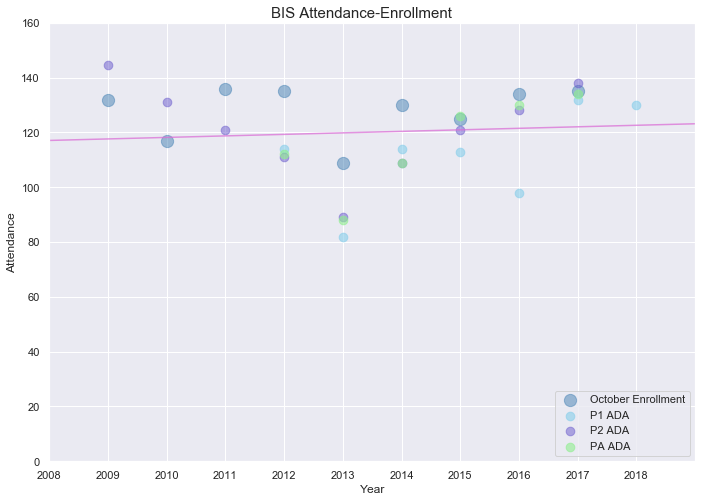

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.2291
Date:                Fri, 23 Nov 2018   Prob (F-statistic):              0.636
Time:                        16:57:09   Log-Likelihood:                -128.78
No. Observations:                  31   AIC:                             261.6
Df Residuals:                      29   BIC:                             264.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -994.1267   2328.238     -0.427      0.6

In [34]:
all_attendance(regression=True, title='BIS Attendance-Enrollment', both=True)

Although R^2 is weaker, the standard error is a little lower, and the confidence interval is a little smaller. It's safe to say that enrollment mixes in reasonably well with attendance.

#### P1 Regression Line

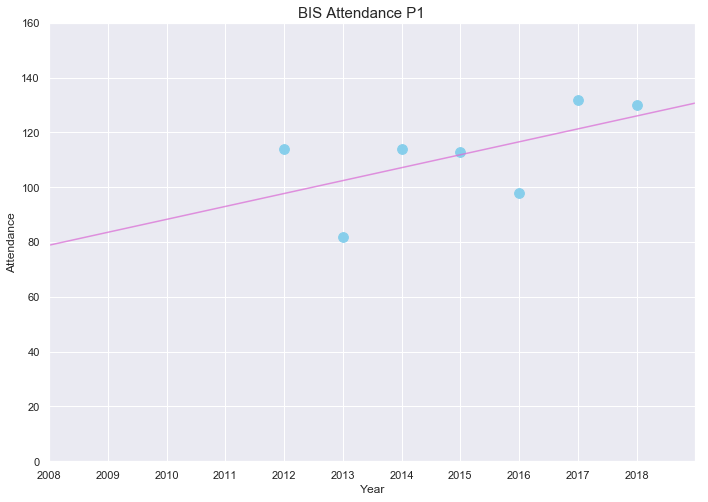

                            OLS Regression Results                            
Dep. Variable:                 P1 ADA   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     2.579
Date:                Fri, 23 Nov 2018   Prob (F-statistic):              0.169
Time:                        16:57:10   Log-Likelihood:                -27.956
No. Observations:                   7   AIC:                             59.91
Df Residuals:                       5   BIC:                             59.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9387.4286   5915.450     -1.587      0.1

In [35]:
ols(x_P1, y_P1, 'skyblue', title='BIS Attendance P1', alpha=1.0)

This dataset is a good example of how R^2 can be overrated. Although R^2 has gone considerably up, the standard error has gone considerably down, and the confidence interval is much wider. The data is also limited due to NaN values from the first few years.

#### P2 Regression Line

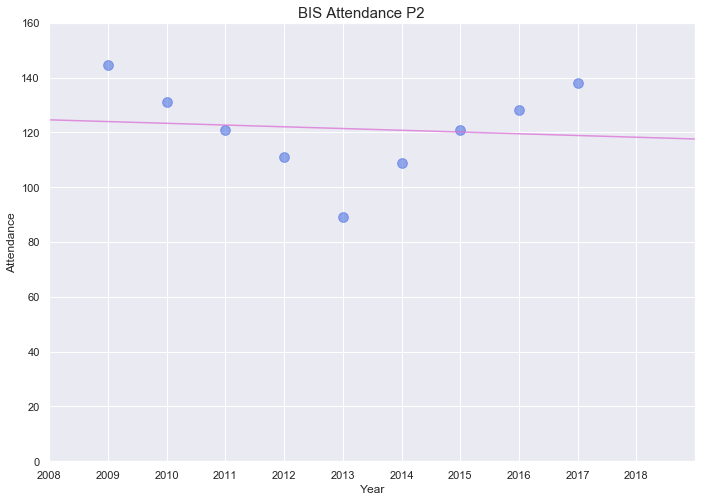

                            OLS Regression Results                            
Dep. Variable:                 P2 ADA   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.131
Method:                 Least Squares   F-statistic:                   0.07549
Date:                Fri, 23 Nov 2018   Prob (F-statistic):              0.791
Time:                        16:57:11   Log-Likelihood:                -37.608
No. Observations:                   9   AIC:                             79.22
Df Residuals:                       7   BIC:                             79.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1400.3460   4654.720      0.301      0.7

In [36]:
ols(x_P2, y_P2, 'royalblue', alpha=0.55, title='BIS Attendance P2')

Period 2 has a definite V-shape. It shows the general trend of attendance going down, and then back up.

#### P2 Quadratic Fit

Here's a quadratic model just for fun.

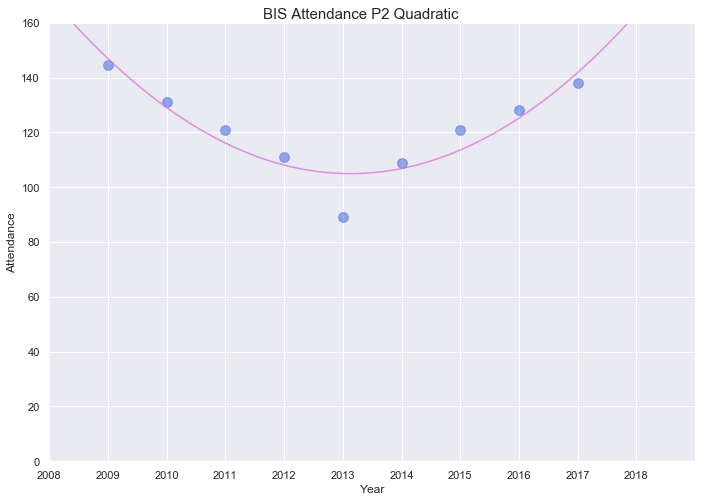

                            OLS Regression Results                            
Dep. Variable:                 P2 ADA   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     14.98
Date:                Fri, 23 Nov 2018   Prob (F-statistic):            0.00465
Time:                        16:57:11   Log-Likelihood:                -29.600
No. Observations:                   9   AIC:                             65.20
Df Residuals:                       6   BIC:                             65.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.978e+06   1.83e+06      5.438      0.0

In [37]:
ols(x_P2, y_P2, 'royalblue', alpha=0.55, title='BIS Attendance P2 Quadratic', degree=2)

It's a great model for obtaining results from 2008-2018, but it's worthless for predicting the future and pre-2008 past.

#### PA Regression Line

I am not sure what PA refers to.

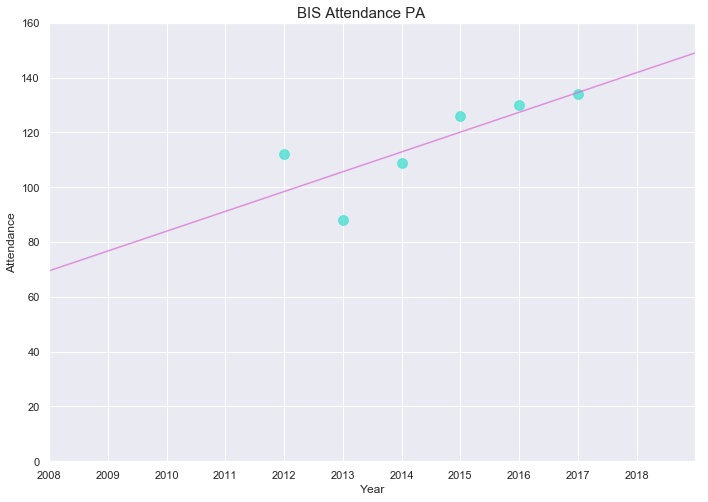

                            OLS Regression Results                            
Dep. Variable:                 PA ADA   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     6.613
Date:                Fri, 23 Nov 2018   Prob (F-statistic):             0.0619
Time:                        16:57:12   Log-Likelihood:                -22.085
No. Observations:                   6   AIC:                             48.17
Df Residuals:                       4   BIC:                             47.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.445e+04   5662.584     -2.551      0.0

In [38]:
ols(x_PA, y_PA, 'turquoise', title='BIS Attendance PA', alpha=0.75)

PA also has missing NaN values. The shape and results are very similar to P1.

# Bootstrap

We will now determine whether the attendance for P1, the earliest on record, is statistically significant. Since it's attendance, and not enrollment, we will compare it to other attendance periods.

The general outline for the hypothesis test will work as follows:
1. Collect all attendance entires for BIS during 2008-2018.
2. Calculate the P1 mean attendance for BIS during 2008-2018.
3. Use bootstrapping as follows:
    1. Take 100,000 samples of #1 with replacement to obtain 100,000 mean attendance values.
    2. Compute 95% Confidence Interval since means are approximately normally distributed.
    3. Discover if #2 falls within the 95% Confidence Interval.
    
A note on bootstrapping: If one has never done it before, bootstrapping seems a bit strange. The general idea is to force a normal distribution to take advantage of general statistical methods like confidence intervals. Bootstrapping is totally justified because when resampling a significant number of times, like over 10,000, a normal distribution naturally takes shape. 
Thus means above 97.5%, or less than 2.5% are shown to be rare and indeed statistically significant.

In [39]:
#Returns the result of a function, like np.mean(), for a replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Calls above function to produce results of desired function, like np.mean(), for all replicants
def draw_bs_reps(data, func, size=len(x_P1)):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [40]:
def bootstrap_plot(y, label, color='c', alpha=0.7, title='Mean Attendance', bins=25):
    
    # Compute actual mean
    mean = y.mean()
    print("The actual mean of", label, "is:", mean)

    # Take 100,000 bootstrap replicates of the mean: bs_replicates
    bs_replicates = draw_bs_reps(y, np.mean, size=100000)
    
    # Compute bootstrapped mean
    bs_mean = bs_replicates.mean()
    print("The boostrapped mean is:", bs_mean)

    # Compute and print SEM
    sem = np.std(y) / np.sqrt(len(y))
    print("The standard error of the bootstrapped mean is:", sem)
    
    # Compute and print standard deviation of bootstrap replicates
    bs_std = np.std(bs_replicates)
    print("The standard deviation of the bootstrapped mean is:", bs_std)
    
    # This is a 95% Confidence Interval
    CI = np.percentile(bs_replicates,[2.5, 97.5])
    print("We are 95% confidnet that the true mean is captured by the following interval:", CI)

    # Make a histogram of the results
    plt.figure(figsize=(10,7))
    plt.hist(bs_replicates, bins=bins, density=True, color=color, alpha=alpha)
    plt.xlabel('Bootstrap Mean')
    plt.ylabel('PDF')
    plt.title(title, fontsize=15)
    plt.show()
    
    # Show the plot
    plt.show()

#### Bootstrap P1

Although we don't need to bootstrap P1, we only need the mean, it can be instructive to bootstrap it anyways and compare means.

The actual mean of Period 1 is: 111.85714285714286
The boostrapped mean is: 111.83742857142856
The standard error of the bootstrapped mean is: 6.109305620146193
The standard deviation of the bootstrapped mean is: 6.102991096710745
We are 95% confidnet that the true mean is captured by the following interval: [100.         123.42857143]


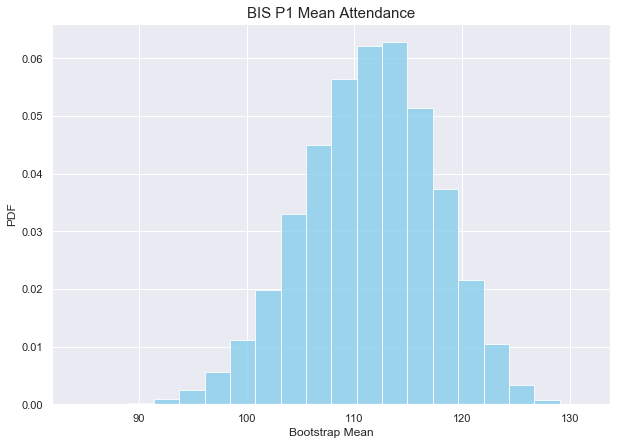

In [41]:
bootstrap_plot(y_P1, "Period 1", color='skyblue', alpha=0.8, title='BIS P1 Mean Attendance', bins=20)

#### Bootstrap All Attendance Periods

This is the important bootstrap. If the mean of P1, 111.857, falls outside of the upcomping Confidence Interval, then it will be statistically significant. Otherwise it's not.

The actual mean of all attendance periods is: 117.03545454545453
The boostrapped mean is: 117.03502392727269
The standard error of the bootstrapped mean is: 3.4999116710975144
The standard deviation of the bootstrapped mean is: 3.506089223717382
We are 95% confidnet that the true mean is captured by the following interval: [110.         123.72727273]


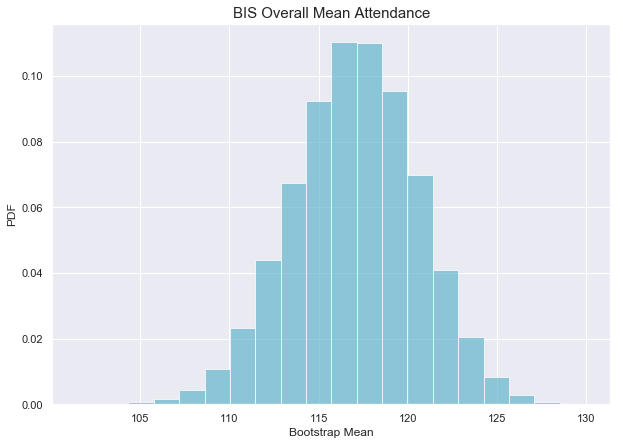

In [42]:
bootstrap_plot(y_att, "all attendance periods", color='c', title='BIS Overall Mean Attendance', bins=20)

Since 111.857 is not in the 95% Confidence Interval [110.00 123.68], we conclude that it is not statistically significant.

#### More Bootstraps

These are not needed, but here are the other bootstrapped periods for the fun of it.

The actual mean of Period 2 is: 121.42
The boostrapped mean is: 121.39800553333335
The standard error of the bootstrapped mean is: 5.293719549302424
The standard deviation of the bootstrapped mean is: 5.309083252944456
We are 95% confidnet that the true mean is captured by the following interval: [110.55555556 131.33366667]


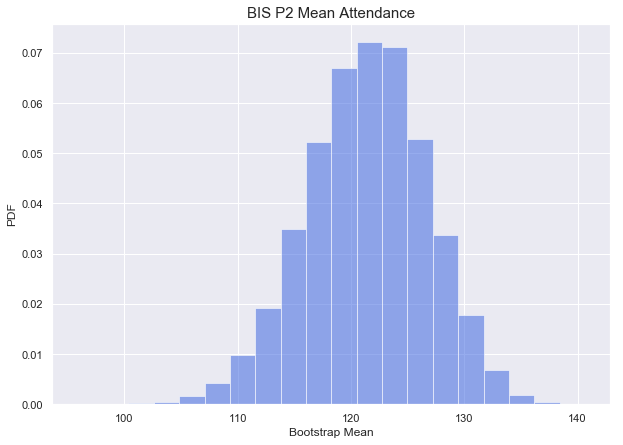

In [43]:
bootstrap_plot(y_P2, "Period 2", color='royalblue', alpha=0.55, title='BIS P2 Mean Attendance', bins=20)

The actual mean of Period A is: 116.5
The boostrapped mean is: 116.47590166666666
The standard error of the bootstrapped mean is: 6.384660436459319
The standard deviation of the bootstrapped mean is: 6.380617228354558
We are 95% confidnet that the true mean is captured by the following interval: [103.         127.83333333]


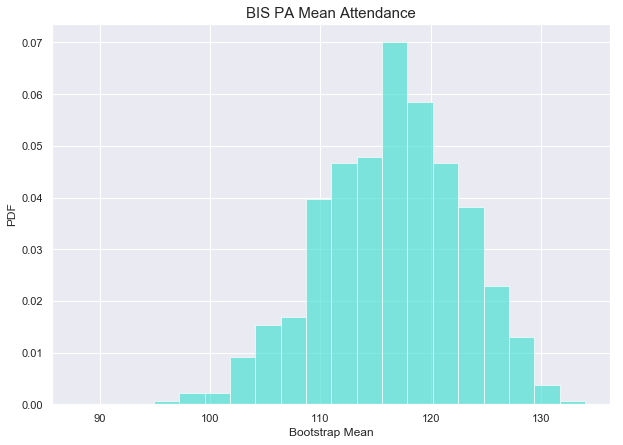

In [44]:
bootstrap_plot(y_PA, "Period A", color='turquoise', alpha=0.65, title='BIS PA Mean Attendance', bins=20)

The actual mean of Enrollment is: 128.11111111111111
The boostrapped mean is: 128.11790666666667
The standard error of the bootstrapped mean is: 2.9583297107727193
The standard deviation of the bootstrapped mean is: 2.9645173642838967
We are 95% confidnet that the true mean is captured by the following interval: [121.77777778 133.33333333]


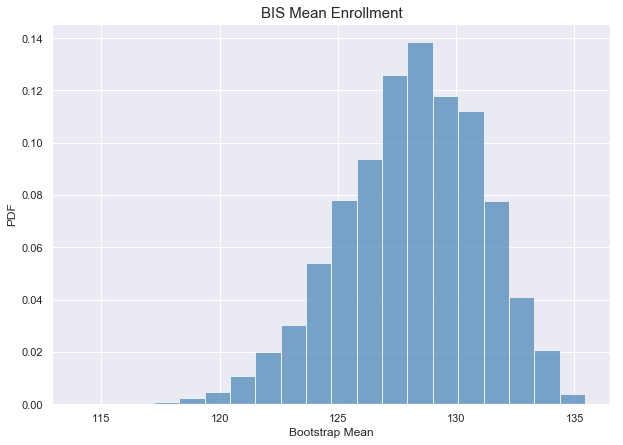

In [45]:
bootstrap_plot(y_E, "Enrollment", color='steelblue', title='BIS Mean Enrollment', bins=20)

## Conclusions

The data suggests that BIS enrollment is predictable. In particular, October enrollment is consistently above 130 students, and it's expected to fluctuate between -3 and +4 students in subsequent years. The accuracy of these predictions are within a 95% Confidence Interval and a Standard Error of 1.3.

BIS P1 Attendance is not statisitically significant at a 95% Confidence Level. Although BIS P1 Attendance is generally lower, it cannot be ruled out that this is due to chance. Other contributing factors may be limited data, and a higher percentage of enrolled students who do not complete work early in the year and therefore do not earn attendance. Such students are likely to be replaced later in the year with students who complete homework and therefore earn attendance. Thus attendance would go up, but enrollment would go down.

It is recommended that more data is collected for further analysis. 